<a href="https://colab.research.google.com/github/iabhibagaria/Abhi/blob/master/Game_of_throne_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this Notebook we will analyse the data from Game of thrones T.V. series.

Data for analysis comprises of battles, deaths etc

At first we will import battles dataset and analyse that.

In [13]:
import numpy as np
import pandas as pd

from pylab import rcParams
rcParams['figure.figsize'] = 13,9


In [14]:
data = pd.read_csv("/content/drive/MyDrive/Ml dl data science  datasets/got dataset/battles.csv")
data.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [15]:
data.columns

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note'],
      dtype='object')

As most of the values of columns like atacker2, etc. are NaN so we will replace them with 0. 

In [16]:
data = data.fillna(0)

In [17]:
data.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,0,0,0,Tully,0,0.0,0.0,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,0
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,0,0,0,Baratheon,0,0.0,0.0,win,ambush,1.0,0.0,0.0,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,0
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,0,0,0,Tully,0,0.0,0.0,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,0
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,0,0,0,Lannister,0,0.0,0.0,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,0
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,0,0,Lannister,0,0.0,0.0,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,0


Now for visualisation we will use plotting.

For plotting we will mainly use Matplotlib and seaborn libraries

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

1. Battles in a year

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


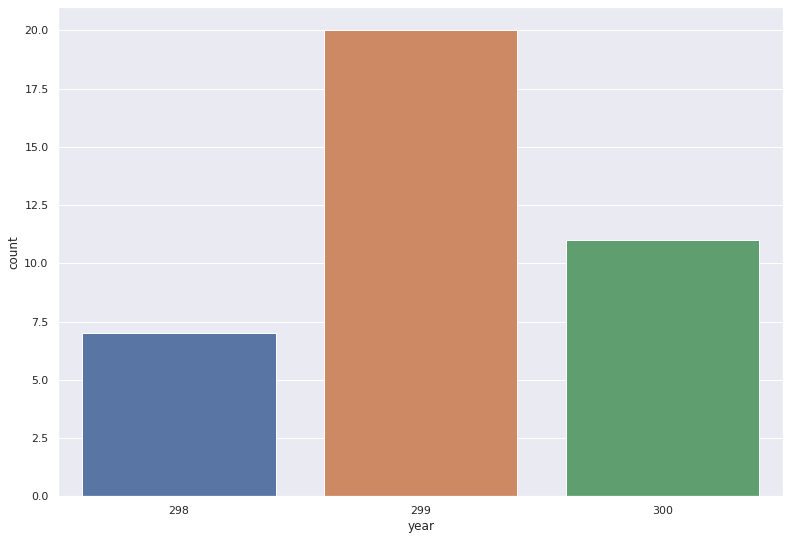

In [19]:
battles_per_year = data['year']  # retrieving data from dataset in a column

sns.countplot(battles_per_year)

2. Now we will analyse the battle kings and get knowledge of battles they fought and won out of them

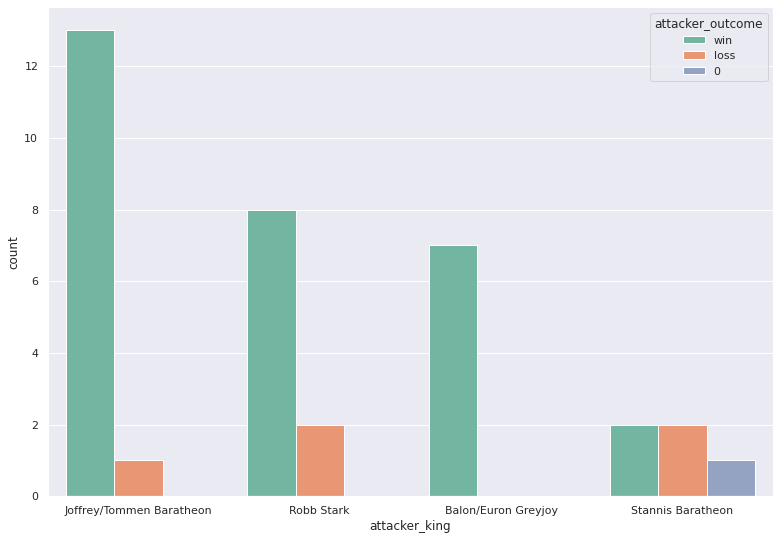

In [20]:
#frist retrieve the data we need for analysis
battles = data[["attacker_king","attacker_outcome"]]

battles_new = battles[battles["attacker_king"] != 0 ]
battles_new2 = battles_new[battles_new["attacker_outcome"] != 0]

sns.countplot(x='attacker_king', hue= 'attacker_outcome', data= battles_new, palette='Set2')

The below box plot shows the relation between the attacker size and the result of the battles with respect to attacker (i.e. Whether attacker won the battle or lost it)

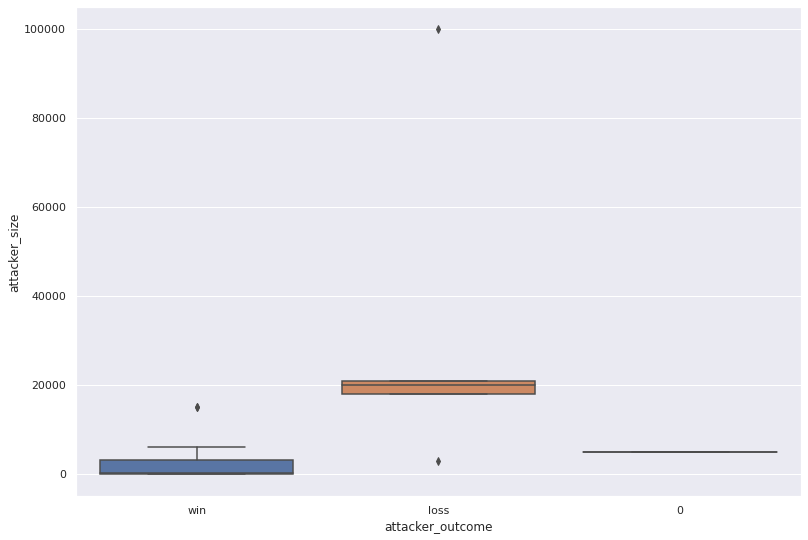

In [21]:
sns.boxplot(x="attacker_outcome", y="attacker_size", data= data)

The below box plot shows the relationship between the defender size and the result of the battles with respect to attacker(i.e. Whether the attacker won the battle or lost it)



In [28]:
# we have to formulate and add defender_outcome column in data dataframe.

def populate_defender_outcome(attacker_outcome):
  defender_outcome = []

  for outcome in attacker_outcome:
    if outcome == 'win':
      defender_outcome.append('loss')
    elif outcome == 'loss':
      defender_outcome.append('win')
    else:
      defender_outcome.append(np.nan)
  return defender_outcome

defender_outcome = populate_defender_outcome(data.attacker_outcome)

data['defender_outcome'] = defender_outcome    

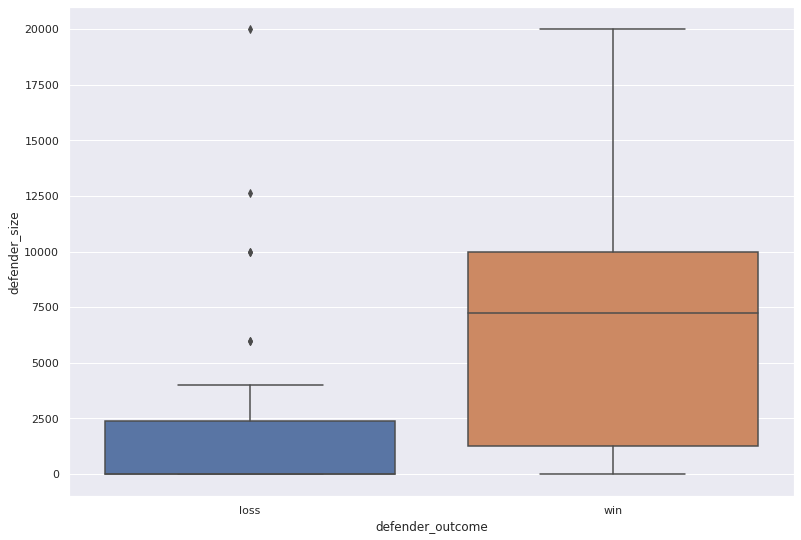

In [29]:
sns.boxplot(x='defender_outcome', y='defender_size', data=data)

The below chart shows how the number of major deaths affected the result of battle for the attacker



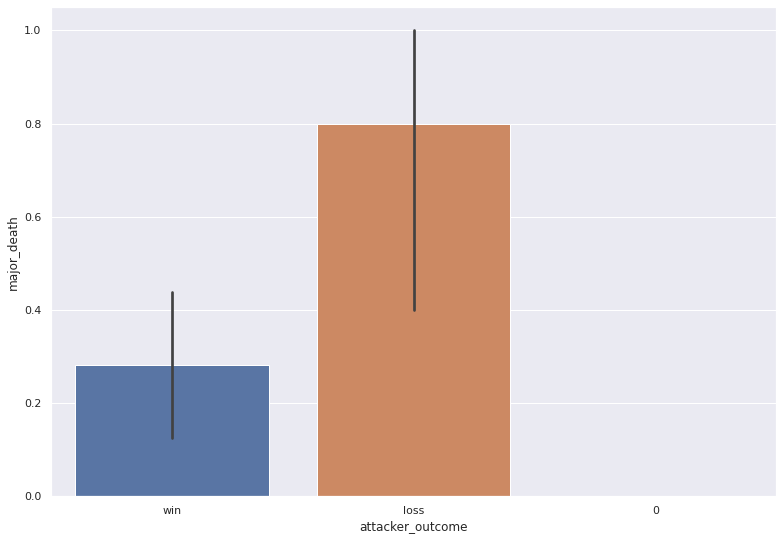

In [30]:
sns.barplot(x='attacker_outcome', y="major_death", data=data)

The below chart shows how the number of major capture affacted the result of battle for the attacker

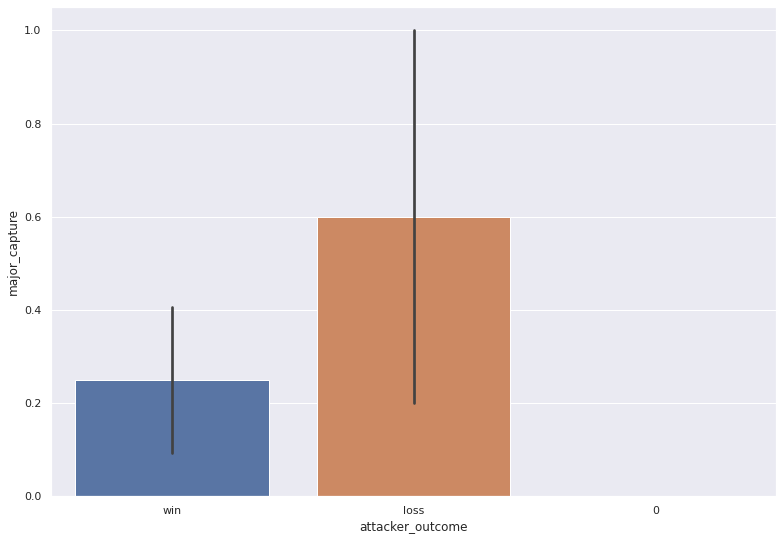

In [33]:
sns.barplot(x='attacker_outcome', y='major_capture', data=data)